In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [42]:
X, y = make_blobs(n_features=2, centers=2, random_state=42)

In [43]:
(y==0).astype(int)

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [44]:
class CustomLogisticReg:
    
    def __init__(self, lr=.1, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        self.classes = np.unique(y)
        
        thetas = []
        
        for item in self.classes:
            y_mod = (y==item).astype(int)
            self.__theta = np.random.randn(X.shape[1], 1)
            for i in range(self.max_iters):
                self.gradient_accend(X, y_mod)
            
            thetas.append(self.__theta)
            
        arr = np.hstack(thetas)
        self.coef_ = arr[1:, :].reshape(-1,2)
        self.intercept_ = arr[0, :]
        self.thetas = arr
    
    def gradient_accend(self, X, y):
        delta_theta = self.gradient(X, y)
        self.__theta += delta_theta
        
    def gradient(self, X, y):
        yh = self.hypothesis(X)
        ya = y.reshape(-1, 1)
        diff = (yh - ya)
        
        dll2theta = np.dot(X.T, diff) / len(X)
        return -dll2theta*self.lr
    
    def hypothesis(self, X):
        g = np.dot(X, self.__theta)
        return 1/(1 + np.exp(-g))
    
    def predict_proba(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        g = np.dot(X, self.thetas)
        return 1/(1 + np.exp(-g))
    
    def predict(self, X):
        values = self.predict_proba(X)
        
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean((yp==y))

In [45]:
model = CustomLogisticReg(max_iters=100)

In [46]:
model.fit(X,y)

In [47]:
model.coef_

array([[-0.93222123,  1.29683279],
       [ 0.59532079, -0.22020783]])

In [51]:
model2.coef_

array([[ 1.37564164, -0.34951798]])

In [49]:
model2 = LogisticRegression()

In [50]:
model2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
model2.intercept_

array([-3.55924712, -1.19099092, -0.43285953, -2.92642308, -1.47901297,
       -3.50910564])

In [24]:
model.intercept_

array([-3.02082063, -0.88188424, -0.30834412, -1.57226651, -1.22286796,
       -1.87617458])

(-20, 20)

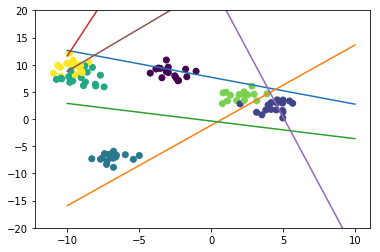

In [41]:
x1 = np.linspace(-10,10, 50)
for i in range(len(model2.coef_)):
    m1, m2 = model2.coef_[i]
    c = model2.intercept_[i]
    x2 = -(m1*x1)/m2 -c/m2
    plt.plot(x1,x2)
plt.scatter(X[:,0], X[:,1],c=y)
plt.ylim(-20,20)

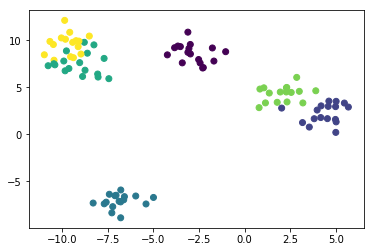

In [38]:
plt.scatter(X[:,0], X[:,1],c=y)